# Import and execute module code:
The module should be quite independent of the rest of qpms, so there should be now no imports therefrom.

In [1]:
import importlib
spec = importlib.util.spec_from_file_location("lattices2d", "../../qpms/lattices2d.py")
lattices2d = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lattices2d)

# Playground:

## Lattice classification
TODO convert this to regular unit tests

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
bs = 100e-9
latsiz=5
from math import sin, cos, sqrt, floor
s2 = sqrt(2)
s3 = sqrt(3)
pi = np.pi

def draw_and_classify(b1, b2):
    f, ax = plt.subplots(figsize=(6,6))
    #points = generateLattice(b1,b2, maxlayer=latsiz,include_origin=True)
    points = lattices2d.generateLatticeDisk(b1,b2,bs*latsiz, include_origin=True)
    ax.plot(points[:,0], points[:,1], 'ko-', lw=0.3)
    ax.plot((0,b1[0]), (0, b1[1]), '--', label = 'b1 input')
    ax.plot((0,b2[0]), (0, b2[1]), '--', label = 'b2 input')
    #ax.arrow(0,0,b1[0], b1[1]) # arrows seem to be broken at this scale
    #ax.arrow(0,0,b2[0], b2[1])
    
    wsc = lattices2d.cellCornersWS(b1,b2)
    codesWS = [Path.MOVETO] + (len(wsc)-1)*[Path.LINETO] + [Path.CLOSEPOLY]
    vertsWS = list(wsc) + [wsc[0]]
    vertsWSbig = list(wsc*latsiz) + [wsc[0]]
    patchWSbig = patches.PathPatch(Path(vertsWSbig, codesWS), ls='--')
    patchWS = patches.PathPatch(Path(vertsWS, codesWS), facecolor='yellow')
    ax.add_patch(patchWSbig)
    ax.add_patch(patchWS)
    

    
    altorig = (3*b1[0], 3*b1[1])
    b1, b2 = lattices2d.reduceBasisSingle(b1,b2)
    pointsWS = lattices2d.filledWS(b1,b2, density=latsiz, scale=3)+2*b1+2*b2
    pointsWS2 = lattices2d.filledWS2(b1,b2, density=latsiz, scale=3)-2*b1-2*b2
    ax.plot(pointsWS[:,0], pointsWS[:,1], 'r.')
    ax.plot(pointsWS2[:,0], pointsWS2[:,1], 'g.')
    altorig = (3*b1[0], 3*b1[1])
    b3 = (b2[0]-b1[0], b2[1]-b1[1]) # yök
    ax.plot((altorig[0],altorig[0]+b1[0]), (altorig[1], altorig[1] + b1[1]), '--', label='b1 reduced')
    ax.plot((altorig[0],altorig[0]+b2[0]), (altorig[1], altorig[1] + b2[1]), '--', label='b2 reduced')
    ax.plot((altorig[0],altorig[0]+b3[0]), (altorig[1], altorig[1] + b3[1]), '--', label='b3 reduced')
    altorig = (3*b2[0], 3*b2[1])
    if lattices2d.is_obtuse(b1,b2):
        b1, b2, b3 = lattices2d.shortestBase3(b1, b2)
        ax.plot((altorig[0],altorig[0]+b1[0]), (altorig[1], altorig[1] + b1[1]), '--', label='b1 n/o')
        ax.plot((altorig[0],altorig[0]+b2[0]), (altorig[1], altorig[1] + b2[1]), '--', label='b2 n/o')
        ax.plot((altorig[0],altorig[0]+b3[0]), (altorig[1], altorig[1] + b3[1]), '--', label='b3 n/o')
    ax.legend()
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b1[0], altorig[1]+b1[1])
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b2[0], altorig[1]+b2[1])
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b3[0], altorig[1]+b3[1])
    ax.set_aspect('equal')
    print(lattices2d.reciprocalBasis(b1,b2))
    print(lattices2d.reduceBasisSingle(*lattices2d.reciprocalBasis(b1,b2)))
    return lattices2d.classifyLatticeSingle(b1,b2)

### Square lattices

(array([       -0.        ,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))
(array([       -0.        ,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))


<LatticeType.SQUARE: 4>

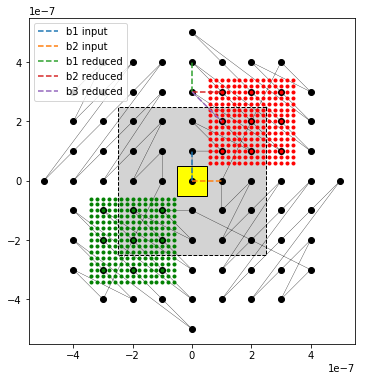

In [3]:
b1 = (0,bs)
b2 = (bs,0)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 31415926.53589794,  31415926.53589794]), array([ 31415926.53589794, -31415926.53589794]))
(array([ 31415926.53589794,  31415926.53589794]), array([ 31415926.53589794, -31415926.53589794]))


<LatticeType.SQUARE: 4>

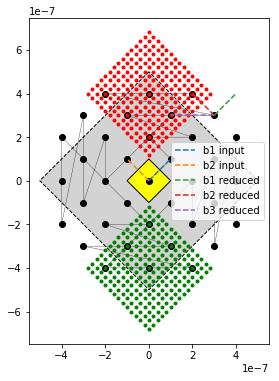

In [4]:
b1 = (bs,bs)
b2 = (-bs,bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 58659561.26450264,  22514387.23775986]), array([-22514387.23775986,  58659561.26450264]))
(array([ 58659561.26450264,  22514387.23775986]), array([-22514387.23775986,  58659561.26450264]))


<LatticeType.SQUARE: 4>

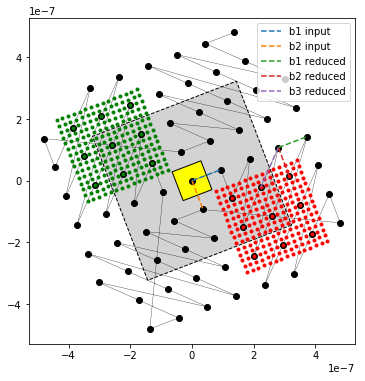

In [5]:
fi = np.random.rand() * 2*pi
b1 = (bs*sin(fi), bs*cos(fi))
b2 = (bs*cos(fi), -bs*sin(fi))
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Rectangular lattices

(array([       -0.        ,  62831853.07179586]), array([-57119866.42890532,        -0.        ]))
(array([-57119866.42890532,        -0.        ]), array([        0.        ,  62831853.07179586]))


<LatticeType.RECTANGULAR: 2>

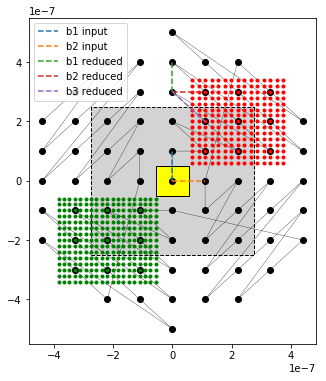

In [6]:
b1 = (0,bs)
b2 = (1.1*bs,0)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -1.57079633e+08,   1.57079633e+08]), array([-31415926.53589794, -31415926.53589794]))
(array([-31415926.53589794, -31415926.53589794]), array([ -1.57079633e+08,   1.57079633e+08]))


<LatticeType.RECTANGULAR: 2>

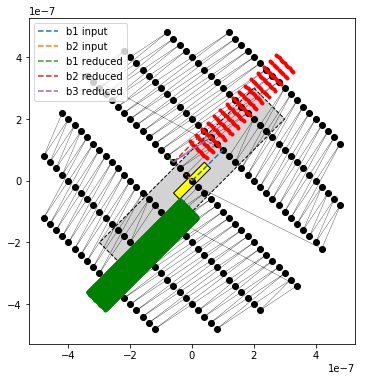

In [7]:
b1 = (bs,bs)
b2 = (-bs*.2,bs*.2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -0.00000000e+00,   6.28318531e+08]), array([ -1.57079633e+08,  -0.00000000e+00]))
(array([ -1.57079633e+08,  -0.00000000e+00]), array([  0.00000000e+00,   6.28318531e+08]))


<LatticeType.RECTANGULAR: 2>

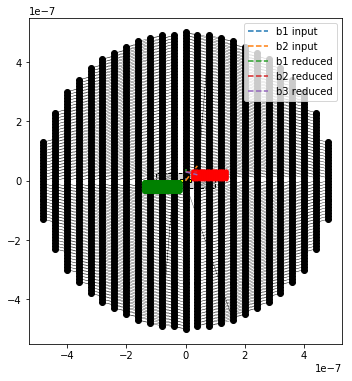

In [8]:
b1 = (0,.1*bs)
b2 = (.4*bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -2.92821501e+08,  -1.20737812e+08]), array([-23951072.65692375,  58087760.14805961]))
(array([-23951072.65692375,  58087760.14805961]), array([ -2.92821501e+08,  -1.20737812e+08]))


<LatticeType.RECTANGULAR: 2>

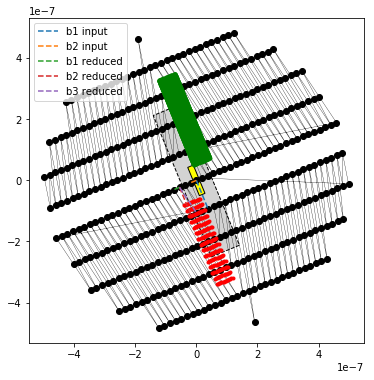

In [9]:
fi = np.random.rand() * 2*pi
fac = np.random.rand()  # For the "real" unit test, this may not be too near to one
b1 = (bs*sin(fi), bs*cos(fi))
b2 = (bs*cos(fi)*fac, -bs*sin(fi)*fac)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -2.92821501e+08,  -1.20737812e+08]), array([-23951072.65692375,  58087760.14805961]))
(array([-23951072.65692375,  58087760.14805961]), array([ -2.92821501e+08,  -1.20737812e+08]))


<LatticeType.RECTANGULAR: 2>

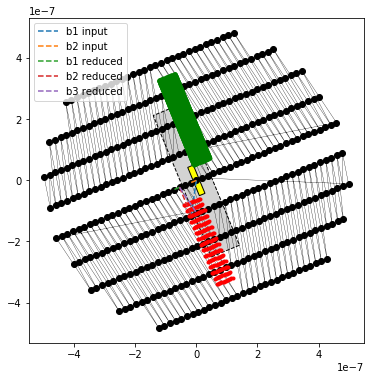

In [10]:
b1 = np.array(b1) + 3*np.array(b2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Equilateral triangular lattices

(array([-36275987.28468435,  62831853.07179586]), array([-72551974.56936871,        -0.        ]))
(array([-36275987.28468435,  62831853.07179586]), array([-72551974.56936871,        -0.        ]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

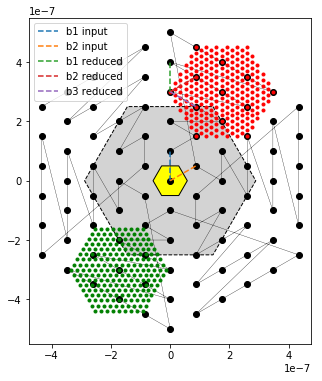

In [11]:
b1 = (0, bs)
b2 = (bs*s3/2, bs/2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([  4.52393745e+07,   1.43030666e+08]), array([  1.46487878e+08,   3.23368855e+07]))
(array([  1.46487878e+08,   3.23368855e+07]), array([  4.52393745e+07,   1.43030666e+08]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

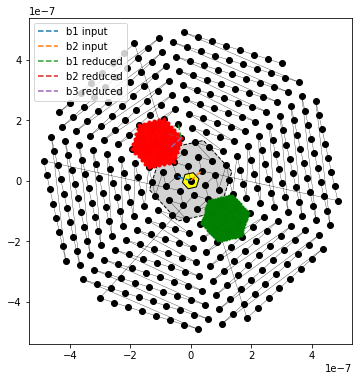

In [12]:
fi = np.random.rand() * 2*pi
fac = np.random.rand()  # For the "real" unit test, this may not be too near to one
b1 = (bs*sin(fi)*fac, bs*cos(fi)*fac)
b2 = (bs*sin(fi+2*pi/3)*fac, bs*cos(fi+2*pi/3)*fac)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([  4.52393745e+07,   1.43030666e+08]), array([ -1.46487878e+08,  -3.23368855e+07]))
(array([ -1.46487878e+08,  -3.23368855e+07]), array([  4.52393745e+07,   1.43030666e+08]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

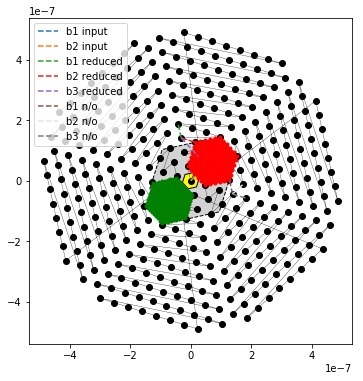

In [13]:
b1 = np.array(b1) + 3*np.array(b2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Rhombic lattices

(array([-31415926.53589794,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))
(array([-62831853.07179587,        -0.        ]), array([-31415926.53589794,  62831853.07179587]))


<LatticeType.RHOMBIC: 5>

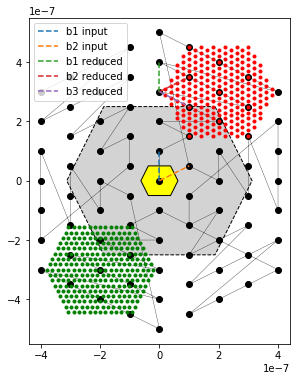

In [14]:
# case |b3| == |b2| > |b1|
b1 = (0,bs)
b2 = (bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))
(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))


<LatticeType.RHOMBIC: 5>

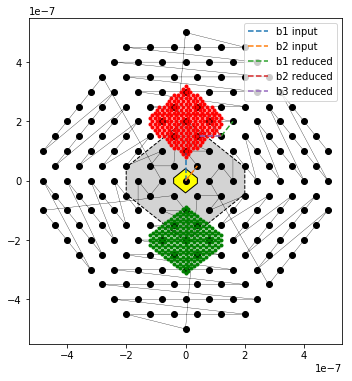

In [15]:
# case |b3| > |b2| == |b1|
b1 = (0,bs)
b2 = (.4*bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

In [16]:
# TODO more

### Oblique lattices

(array([  5.37997742e+07,   6.28318531e+08]), array([ -1.57079633e+08,  -0.00000000e+00]))
(array([ -1.57079633e+08,   0.00000000e+00]), array([  5.37997742e+07,   6.28318531e+08]))


<LatticeType.OBLIQUE: 1>

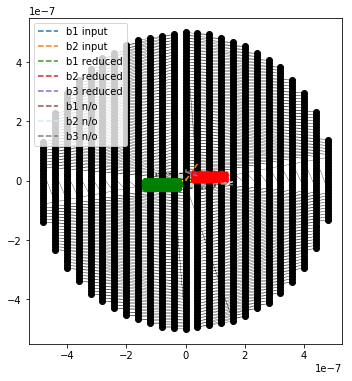

In [17]:
b1 = (0,.1*bs)
b2 = (.4*bs, .56575*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

## Coordinate transform

(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))
(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))


<LatticeType.RHOMBIC: 5>

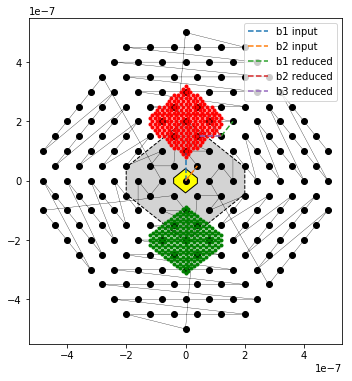

In [18]:
b1 = np.array((0,bs))
b2 = np.array((.4*bs, .5*bs))
draw_and_classify(b1, b2)

(array([-78539816.3397451 ,  62831853.07179596]), array([-78539816.33974427, -62831853.07179604]))
(array([-78539816.33974427, -62831853.07179604]), array([-78539816.3397451 ,  62831853.07179596]))


<LatticeType.RHOMBIC: 5>

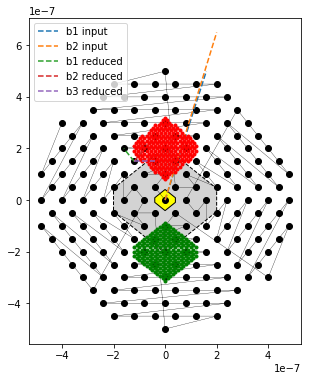

In [19]:
c1 = 3*b1 + 4*b2; c2 = 4*b1 + 5*b2
draw_and_classify(c1,c2)

In [20]:
vectors = [[0,1],[1,0],[1,1],[-4,2]]
trvectors = lattices2d.change_basis((b1,b2),(c1,c2),vectors)
trvectors

array([[  4.,  -3.],
       [ -5.,   4.],
       [ -1.,   1.],
       [ 28., -22.]])

In [21]:
vectorsback = lattices2d.change_basis((c1,c2),(b1,b2),trvectors)
np.all(vectorsback == vectors)

True

In [22]:
lattices2d.change_basis((c1,c2),(b1,b2),vectors)

array([[ 4.,  5.],
       [ 3.,  4.],
       [ 7.,  9.],
       [-4., -6.]])

In [23]:
b1 *= 2017/2016
b2 *= 9999/1000
c1 = 19*b1 + 20*b2; c2 = 20*b1 + 21*b2
trvectors = lattices2d.change_basis((b1,b2),(c1,c2),vectors)
trvectors

array([[  20.,  -19.],
       [ -21.,   20.],
       [  -1.,    1.],
       [ 124., -118.]])

In [24]:
vectorsback = lattices2d.change_basis((c1,c2),(b1,b2),trvectors)
np.all(vectorsback == vectors)

True